<a href="https://colab.research.google.com/github/DoniJ12/Dave-s-React/blob/master/ML_Excersise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"donijy","key":"1f2de00dc73266539ecb9f5094d27370"}'}

In [11]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d rabieelkharoua/cancer-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [13]:
!unzip cancer-prediction-dataset.zip -d dataset_folder  # Replace 'titanic.zip' with your downloaded file name
!ls dataset_folder  # Check the contents

Archive:  cancer-prediction-dataset.zip
  inflating: dataset_folder/The_Cancer_data_1500_V2.csv  
The_Cancer_data_1500_V2.csv


In [14]:
!pip install scikit-learn

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [16]:
#Display the first rows as a DataFrame
df = pd.read_csv('/content/dataset_folder/The_Cancer_data_1500_V2.csv')
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [17]:
print("All Columns in the Dataset:")
print(df.columns.tolist())

All Columns in the Dataset:
['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake', 'CancerHistory', 'Diagnosis']


In [18]:
# Data Preprocessing
df.isnull().sum()
df = df.fillna(df.mean())

In [19]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']  # Target column

In [20]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.8266666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       189
           1       0.85      0.65      0.73       111

    accuracy                           0.83       300
   macro avg       0.83      0.79      0.80       300
weighted avg       0.83      0.83      0.82       300



In [23]:
svm_model = SVC(kernel='linear')  # Linear kernel for simplicity
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       189
           1       0.73      0.77      0.75       111

    accuracy                           0.81       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.81      0.81      0.81       300



In [24]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       189
           1       0.74      0.78      0.76       111

    accuracy                           0.82       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.82      0.82       300



In [25]:
print("Model Comparison:")
print("Naive Bayes:", accuracy_score(y_test, nb_pred))
print("SVM:", accuracy_score(y_test, svm_pred))
print("Logistic Regression:", accuracy_score(y_test, lr_pred))

Model Comparison:
Naive Bayes: 0.8266666666666667
SVM: 0.81
Logistic Regression: 0.82


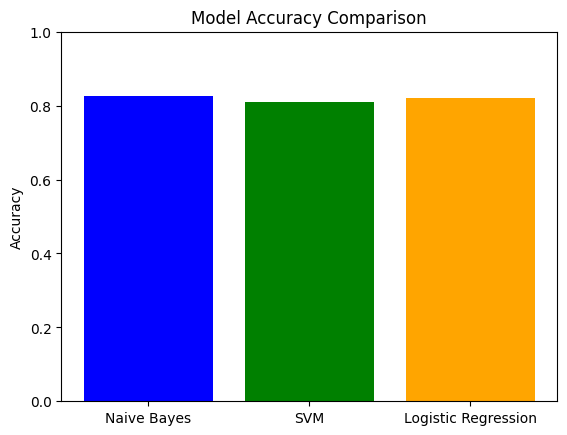

In [26]:
models = ['Naive Bayes', 'SVM', 'Logistic Regression']
accuracies = [accuracy_score(y_test, nb_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, lr_pred)]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()